In [1]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import pylab as pl
from IPython import display
import pandas as pd
import sys
%matplotlib inline

/home/ankit/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def getFeatures(df):
    window_size = 1000
    total_batch = int(len(df)/window_size)
    trainX = pd.DataFrame()
    # Loop over all batches
    for i in range(total_batch):
        n = min(window_size, len(df)-i*window_size)
        df_win = df[i*window_size:i*window_size+n]
        group = df_win.groupby(['SrcAddr'])
        train_win = group.Sport.nunique()
        train_win = pd.DataFrame(train_win)
        train_win['udest_ip'] = group.DstAddr.nunique()
        train_win['udest_port'] = group.Dport.nunique()
        train_win['netflows'] = group.Dport.count()
        temp = pd.get_dummies(group.first()['Proto'])
        try:
            train_win['tcp'] = temp.tcp
        except:
            train_win['tcp'] = group.Dport.count()*0
        try:
            train_win['udp'] = temp.udp
        except:
             train_win['udp'] = group.Dport.count()*0
        train_win['bytes'] = group.TotBytes.sum()
        train_win['packets'] = group.TotPkts.sum()
        train_win['Label'] = (group.Label.sum()*1.0/group.Dport.count())> 0
        trainX = pd.concat([trainX,train_win],axis=0)    
    return trainX

In [3]:
import random

def somerows(x, n):
    return x.sample(n=n)

def selectFlows(filename):
    df = pd.read_csv(filename)
    df['Label'] = df.Label.str.contains("Botnet")
    dft = getFeatures(df)
    dfB = dft[dft['Label'] == True]
    dfN = dft[dft['Label'] == False]
    dfN = somerows(dfN,len(dfB))
#     print len(dfB)
#     print len(dfN)
    df = pd.concat([dfB,dfN],axis=0)   
    df = df.sample(frac=1).reset_index(drop=True)
    return df

In [4]:
dfTrain = pd.DataFrame()
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/3/capture20110812.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/4/capture20110815.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/5/capture20110815-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/7/capture20110816-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
print len(dfTrain)
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/10/capture20110818.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/11/capture20110818-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/12/capture20110819.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/13/capture20110815-3.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 


# df1 = pd.read_csv("/home/ankit/Desktop/MTP/working_directory/Binenetflow/ISCX_Botnet-Training.biargus.binetflow")
# #Add Label to flows
# df1['Label'] = pd.Series(np.zeros(len(df1['Dur'])), index=df1.index)
# malicious_ips = "192.168.2.112 131.202.243.84 192.168.5.122 198.164.30.2 192.168.2.110 192.168.4.118 192.168.2.113 192.168.1.103 192.168.4.120 192.168.2.112 192.168.2.109 192.168.2.105 147.32.84.180 147.32.84.170 147.32.84.150 147.32.84.140 147.32.84.130 147.32.84.160 10.0.2.15 192.168.106.141 192.168.106.131 172.16.253.130 172.16.253.131 172.16.253.129 172.16.253.240 74.78.117.238 158.65.110.24 192.168.3.35 192.168.3.25 192.168.3.65 172.29.0.116 172.29.0.109 172.16.253.132 192.168.248.165 10.37.130.4"
# malicious_ips = malicious_ips.split()

# for i in malicious_ips:
#     df1.loc[df1["SrcAddr"] == i,"Label"] = 1

# df1 = getFeatures(df1)
# dfTrain = pd.concat([dfTrain,df1],axis=0) 
    
print len(dfTrain)

/home/ankit/anaconda2/lib/python2.7/site-packages/pandas/core/groupby.py:2930: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  inc = np.r_[1, val[1:] != val[:-1]]


3456
10712


In [5]:
dfTest = pd.DataFrame()
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/1/capture20110810.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/2/capture20110811.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/6/capture20110816.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/8/capture20110816-3.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/9/capture20110817.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0)


# df1 = pd.read_csv("/home/ankit/Desktop/MTP/working_directory/Binenetflow/ISCX_Botnet-Testing.biargus.binenetflow")
# #Add Label to flows
# df1['Label'] = pd.Series(np.zeros(len(df1['Dur'])), index=df1.index)
# malicious_ips = "192.168.2.112 131.202.243.84 192.168.5.122 198.164.30.2 192.168.2.110 192.168.4.118 192.168.2.113 192.168.1.103 192.168.4.120 192.168.2.112 192.168.2.109 192.168.2.105 147.32.84.180 147.32.84.170 147.32.84.150 147.32.84.140 147.32.84.130 147.32.84.160 10.0.2.15 192.168.106.141 192.168.106.131 172.16.253.130 172.16.253.131 172.16.253.129 172.16.253.240 74.78.117.238 158.65.110.24 192.168.3.35 192.168.3.25 192.168.3.65 172.29.0.116 172.29.0.109 172.16.253.132 192.168.248.165 10.37.130.4"
# malicious_ips = malicious_ips.split()

# for i in malicious_ips:
#     df1.loc[df1["SrcAddr"] == i,"Label"] = 1

# df1 = getFeatures(df1)
# dfTest = pd.concat([dfTest,df1],axis=0) 

print len(dfTest)

32400


In [6]:
def getXY(df):
    temp = pd.get_dummies(df.Label)
    temp = pd.DataFrame(temp)
    Y = temp.as_matrix()
    X = df.copy()
    del X['Label']
    X = (X - X.mean()) / (X.max() - X.min())
    X = X.as_matrix()
    return X,Y

In [7]:
trainX, trainY = getXY(dfTest)

testX, testY = getXY(dfTrain)

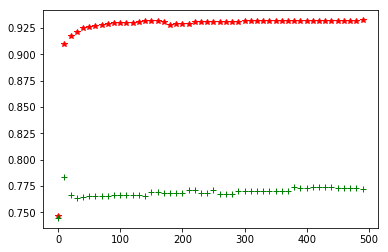

Iteration: 490 Loss: 0.108182901333 Train Accuracy: 0.932469 Test Accuracy: 0.772591 Optimization Finished!
('Accuracy:', 0.77259147)


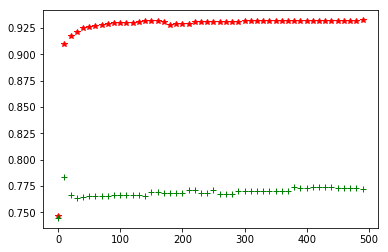

In [59]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    with tf.name_scope("layer1"):
        layer_11 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_11 = tf.nn.sigmoid(layer_11)
        layer_12 = tf.add(tf.matmul(x, weights['h2']), biases['b2'])
        layer_12 = tf.nn.tanh(layer_12)
        layer_1 = tf.add(tf.mul(layer_11, layer_12),1-layer_11)
        layer_1 = tf.nn.relu(layer_1)
        
    with tf.name_scope("layer2"):
        layer_21 = tf.add(tf.matmul(layer_1, weights['h3']), biases['b3'])
        layer_21 = tf.nn.sigmoid(layer_11)
        layer_22 = tf.add(tf.matmul(layer_1, weights['h4']), biases['b4'])
        layer_22 = tf.nn.tanh(layer_12)
        layer_2 = tf.add(tf.mul(layer_21, layer_22),1-layer_21)
        layer_2 = tf.nn.relu(layer_2)
#     # Hidden layer with RELU activation
#     layer_2 = tf.add(tf.matmul(layer_1, weights['h4']), biases['b4'])
#     layer_2 = tf.nn.relu(layer_2)
#     # Hidden layer with RELU activation
#     layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
#     layer_3 = tf.nn.relu(layer_3)
#     # Hidden layer with RELU activation
#     layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
#     layer_4 = tf.nn.tanh(layer_4)
#     # Hidden layer with RELU activation
#     layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
#     layer_5 = tf.nn.sigmoid(layer_5)
#     # Hidden layer with RELU activation
#     layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
#     layer_6 = tf.nn.relu(layer_6)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

#Parameters
learning_rate = 0.001
training_epochs = 500
batch_size = 100
display_step = 10

#Betwork Parameters
n_hidden_1 = 40
n_hidden_2 = 40
n_hidden_3 = 20
n_hidden_4 = 20
# n_hidden_5 = 16
# n_hidden_6 = 8
n_input = 8
n_classes = 2
# tf Graph input
x = tf.placeholder("float", [None, n_input],'x')
y = tf.placeholder("float", [None, n_classes],'y')
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1]),name='wh1'),
    'h2': tf.Variable(tf.random_normal([n_input, n_hidden_1]),name='wh2'),
    'h3': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='wh3'),
    'h4': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='wh4'),
#     'h5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]),name='wh5'),
#     'h6': tf.Variable(tf.random_normal([n_hidden_5, n_hidden_6]),name='wh6'),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]),name='wo')
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.random_normal([n_hidden_1]),name='b2'),
    'b3': tf.Variable(tf.random_normal([n_hidden_2]),name='b3'),
    'b4': tf.Variable(tf.random_normal([n_hidden_2]),name='b4'),
#     'b5': tf.Variable(tf.random_normal([n_hidden_5]),name='b5'),
#     'b6': tf.Variable(tf.random_normal([n_hidden_6]),name='b6'),
    'out': tf.Variable(tf.random_normal([n_classes]),name='bo')
}
    # Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    tf.scalar_summary("cost",cost)
# Initializing the variables
init = tf.initialize_all_variables()


# Test model
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    tf.scalar_summary("accuracy",accuracy)
    
#Launch the graph
with tf.Session() as sess:
#     merged = tf.merge_all_summaries()
#     writer = tf.train.SummaryWriter("./logs/nn_logs",sess.graph)
    sess.run(init)
# Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(trainX)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            n = min(batch_size, len(trainX)-i*batch_size)
            batch_x = trainX[i*batch_size:i*batch_size+n]
            batch_y = trainY[i*batch_size:i*batch_size+n]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
#             result = sess.run([merged], feed_dict={x: batch_x, y: batch_y})
#             writer.add_summary(result,epoch)
            # Calculate batch accuracy
            Train_accuracy = accuracy.eval({x: trainX, y: trainY})
            # Calculate batch loss
            loss = avg_cost
            #testX = testX.reshape(-1,seq_max_len,n_input)
            Test_accuracy=accuracy.eval({x: testX, y: testY})    
            #pl.plot([epoch],loss,'b.',)
            pl.plot([epoch],Train_accuracy,'r*',)
            pl.plot([epoch],Test_accuracy,'g+')
            display.clear_output(wait=True)
            display.display(pl.gcf())   
            sys.stdout.flush()
            print("\rIteration: %s Loss: %s Train Accuracy: %s Test Accuracy: %s"%(epoch,loss,Train_accuracy,Test_accuracy)),
            sys.stdout.flush()
    print("Optimization Finished!")
    
    print("Accuracy:", accuracy.eval({x: testX, y: testY}))
    prediction=tf.argmax(pred,1)
    out =  prediction.eval(feed_dict={x: testX})

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(out, np.argmax(testY,1)) #0 = normal

array([[5202, 2069],
       [ 154, 3287]])

3441